# Further Analysis Into the Top 3 Reasons For Customer Churn 

### <a href="telco_churn.ipynb" target="_self">Introduction</a>&nbsp; &nbsp; &nbsp;<a href="telco_churn_analysis.ipynb" target="_self">Further Analysis</a>&nbsp; &nbsp; &nbsp;<a href="telco_churn_insights.ipynb" target="_self">Final Insights</a>

While exploring the characteristics of Telco’s churned customers, we found that the top three reasons for churn are Competition (39.2%), Poor Customer Support (23.1%), and Product/Service Dissatisfaction (21.4%).

To gain deeper insight into these trends, we will conduct further analysis using key variables from the Telco Churn dataset. This will help us better understand the factors driving customer churn and identify areas for improvement.

In [121]:
install.packages("readxl")
library(readxl)
install.packages("ggplot2")
install.packages("forcats")
install.packages("dplyr")
install.packages("maps")
install.packages("patchwork")
install.packages("viridis")
install.packages("knitr")
library(dplyr)
library(forcats)
library(maps)
library(patchwork)
library(viridis)
library(ggplot2)
library(knitr)

suppressPackageStartupMessages(library(dplyr))
suppressMessages(suppressWarnings(library(ggplot2)))

data <- read_excel('Telco_customer_churn.xlsx')
colnames(data) <- c('CustomerID','Count','Country','State','City','Zip_Code','Lat_Long','Latitude','Longitude','Gender','Senior_Citizen','Partner','Dependents','Tenure_Months','Phone_Service','Multiple_Lines','Internet_Service','Online_Security','Online_Backup','Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies','Contract','Paperless_Billing','Payment_Method','Monthly_Charges','Total_Charges','Churn_Label','Churn_Value','Churn_Score','CLTV','Churn_Reason')


## Why Customers Leave For Competition

Our analysis shows that the majority of customers who leave Telco are on month-to-month contracts and tend to use both internet and phone services. This highlights a key segment where churn is most prevalent and where competitors may be gaining ground.

We will start by evaluating the cost of Telco Services.

`summarise()` has grouped output by 'Product_Type'. You can override using the
`.groups` argument.


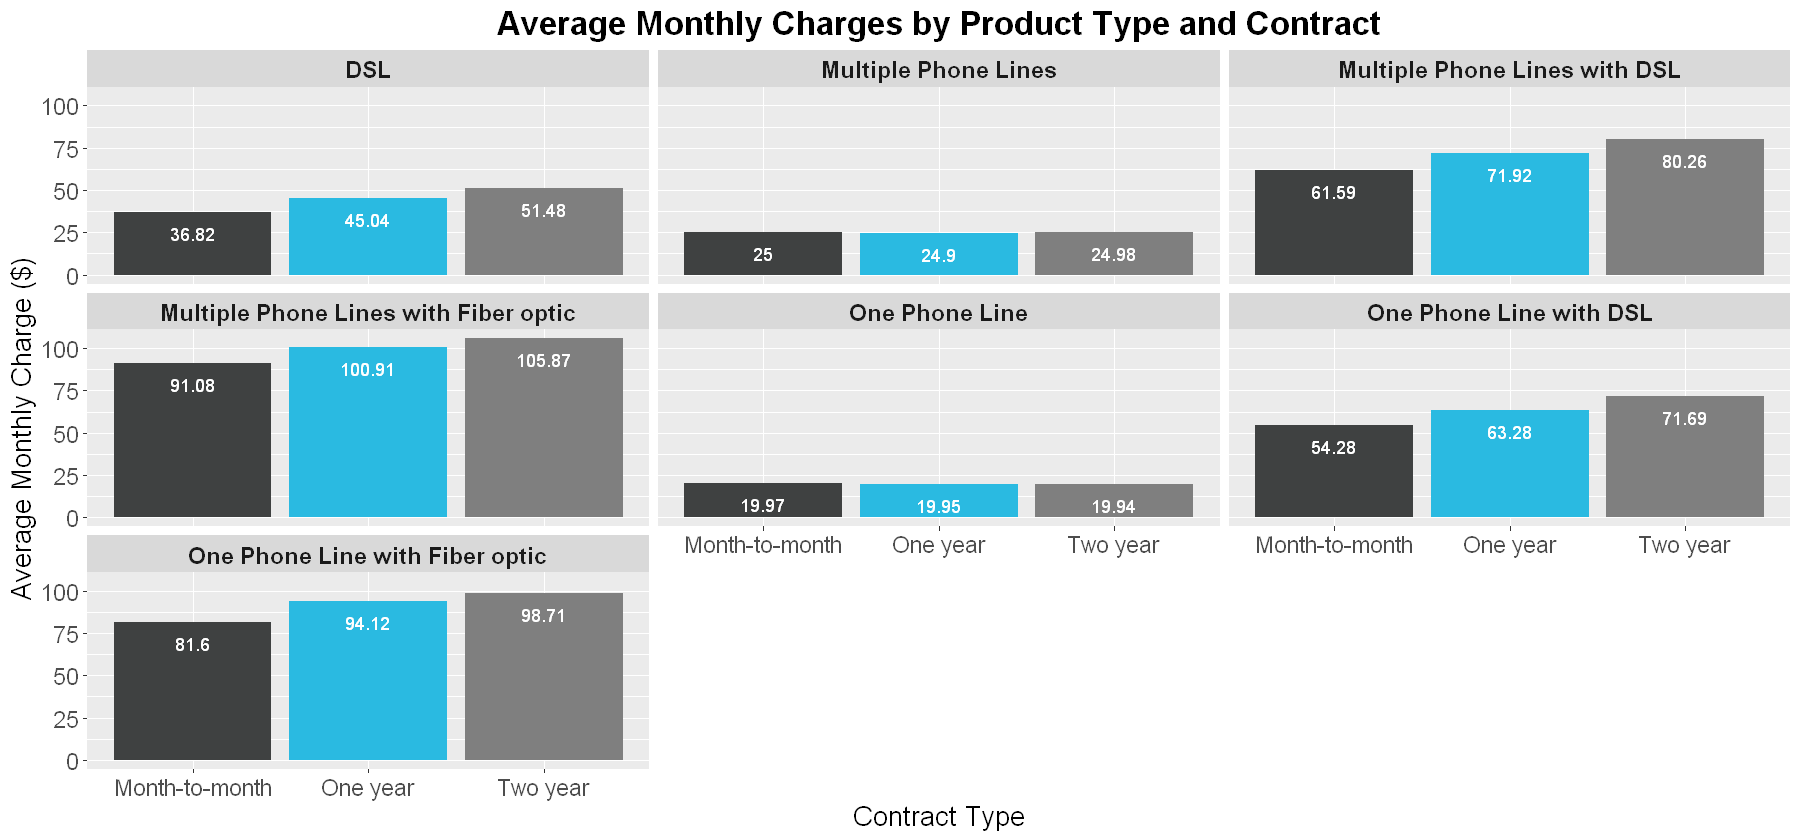

In [140]:
Services <- data %>%
  mutate(
    Product_Type = case_when(
      Internet_Service == "No" & Multiple_Lines == "No" ~ "One Phone Line",
      Internet_Service == "No" & Multiple_Lines == "Yes" ~ "Multiple Phone Lines",
      Internet_Service == "DSL" & Multiple_Lines == "No" ~ "One Phone Line with DSL",
      Internet_Service == "Fiber optic" & Multiple_Lines == "No" ~ "One Phone Line with Fiber optic",
      Internet_Service == "Fiber optic" & Multiple_Lines == "No phone service" ~ "Fiber optic",
      Internet_Service == "DSL" & Multiple_Lines == "No phone service" ~ "DSL",
      Internet_Service == "DSL" & Multiple_Lines == "Yes" ~ "Multiple Phone Lines with DSL",
      TRUE ~ "Multiple Phone Lines with Fiber optic",
    )
  )

average_charges <- Services %>%
  group_by(Product_Type, Contract) %>%
  summarise(
    Avg_Monthly_Charges = mean(Monthly_Charges),
    ) %>%
  arrange(Product_Type, Contract)

ggplot(average_charges, aes(x = Contract, y = Avg_Monthly_Charges, fill = Contract)) +
  geom_col(show.legend = FALSE) +
  geom_text(aes(label = round(Avg_Monthly_Charges, 2)), vjust = 2, color = "White") +
  facet_wrap(~ Product_Type) +
  labs(
    title = "Average Monthly Charges by Product Type and Contract",
    x = "Contract Type",
    y = "Average Monthly Charge ($)"
  ) +
  scale_fill_manual(values = c(
    "Month-to-month" = "#3f4141",
    "One year" = "#2abae1",
    "Two Year" = "#000000"
  )) +
  theme(
    legend.position = "none",
    strip.text = element_text(size = 14, face = "bold"),
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)
  )



By comparing the cost of Telco's services across different product types and contract lengths, we can see that customers on longer-term contracts are actually paying more per month on average. This is counterintuitive, as many telecom providers, likely including Telco’s competitors, offer lower monthly rates for long-term commitments to encourage customer retention.

This pricing structure may help explain why many Telco customers choose month-to-month contracts. Without financial incentives, customers may be less willing to commit long-term.

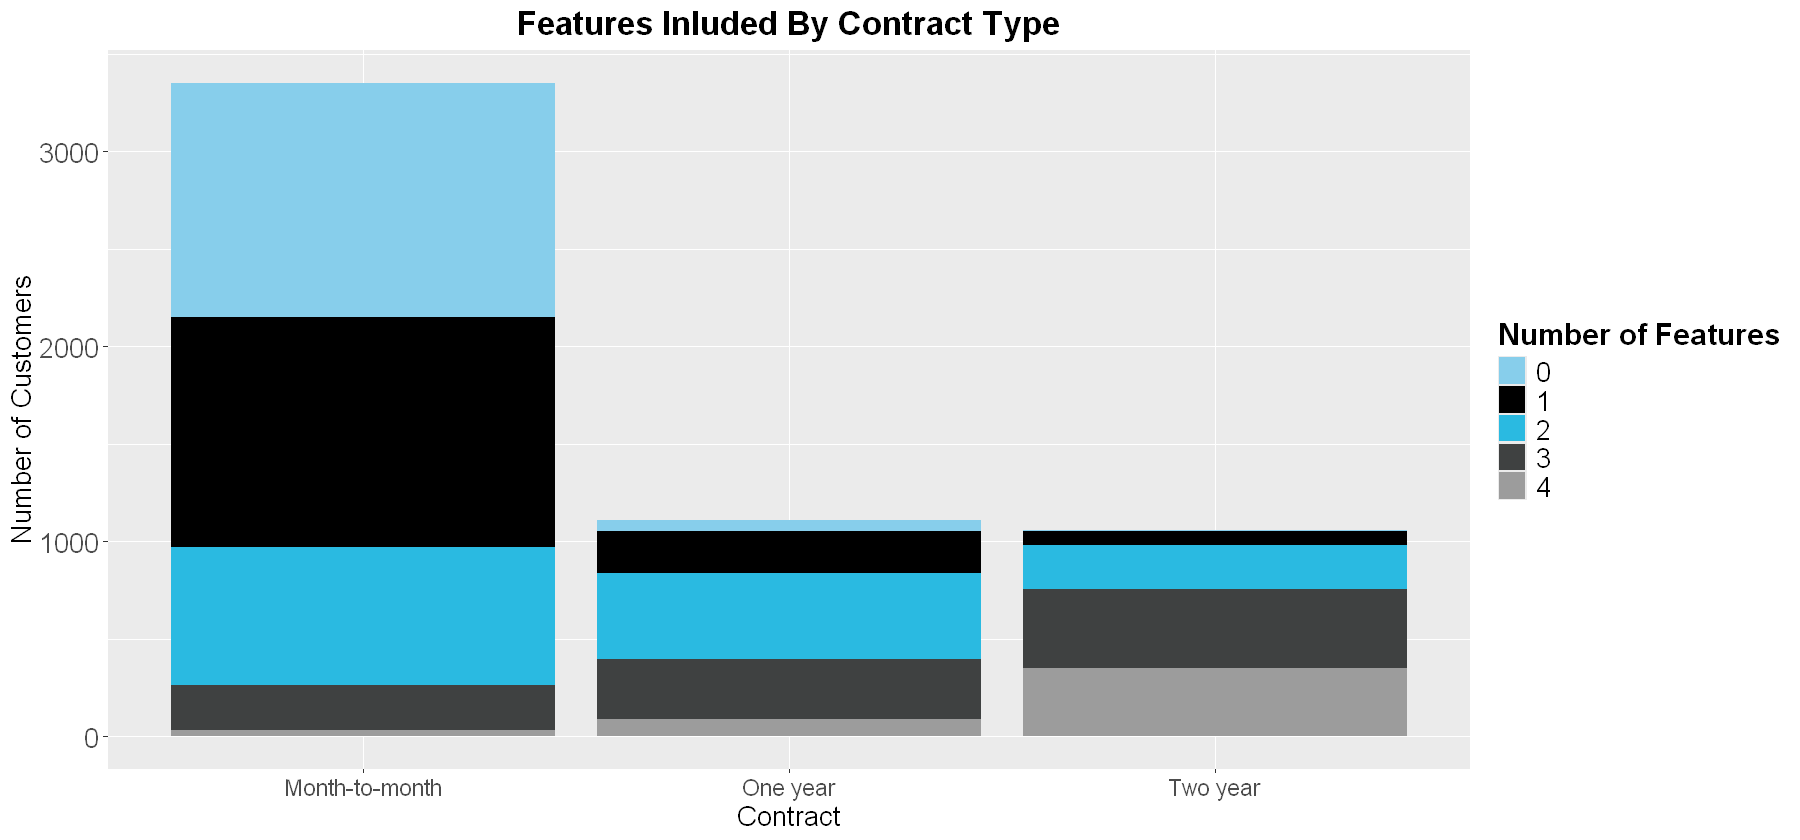

In [145]:
Feature <- data[data$Internet_Service %in% c(
  "DSL",
  "Fiber optic"
), ]

Feature <- Feature %>%
    mutate(
    Features = case_when(
      Online_Security == "Yes" & Online_Backup == "Yes" & Device_Protection == "Yes" & Tech_Support == "Yes"  ~ "4",
        
      Online_Security == "Yes" & Online_Backup == "Yes" & Device_Protection == "Yes" & Tech_Support == "No"  ~ "3",
      Online_Security == "Yes" & Online_Backup == "Yes" & Device_Protection == "No" & Tech_Support == "Yes"  ~ "3",
      Online_Security == "Yes" & Online_Backup == "No" & Device_Protection == "Yes" & Tech_Support == "Yes"  ~ "3",
      Online_Security == "No" & Online_Backup == "Yes" & Device_Protection == "Yes" & Tech_Support == "Yes"  ~ "3",
        
      Online_Security == "Yes" & Online_Backup == "Yes" & Device_Protection == "No" & Tech_Support == "No"  ~ "2",
      Online_Security == "Yes" & Online_Backup == "No" & Device_Protection == "Yes" & Tech_Support == "No"  ~ "2",
      Online_Security == "No" & Online_Backup == "Yes" & Device_Protection == "Yes" & Tech_Support == "No"  ~ "2",
      Online_Security == "Yes" & Online_Backup == "No" & Device_Protection == "No" & Tech_Support == "Yes"  ~ "2",
      Online_Security == "No" & Online_Backup == "Yes" & Device_Protection == "No" & Tech_Support == "Yes"  ~ "2",
      Online_Security == "No" & Online_Backup == "No" & Device_Protection == "Yes" & Tech_Support == "Yes"  ~ "2",
        
      Online_Security == "Yes" & Online_Backup == "No" & Device_Protection == "No" & Tech_Support == "No"  ~ "1",
      Online_Security == "No" & Online_Backup == "Yes" & Device_Protection == "No" & Tech_Support == "No"  ~ "1",
      Online_Security == "No" & Online_Backup == "No" & Device_Protection == "Yes" & Tech_Support == "No"  ~ "1",
      Online_Security == "No" & Online_Backup == "No" & Device_Protection == "No" & Tech_Support == "Yes"  ~ "1",
      TRUE ~ "0",
    )
  )

ggplot(Feature, aes(x = Contract, fill = Features)) +
    geom_bar() +
    labs(
        title = "Features Inluded By Contract Type",
        x = "Contract",
        y = "Number of Customers"
        ) +
    scale_fill_manual(values = c(
       "1" = "#000000",
       "2" = "#2abae1",
       "3" = "#3f4141",
       "4" = "#9c9c9c",
        "0" = "skyblue"
        ),
        name = "Number of Features") +
    theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 16)
  )


This chart illustrates the average number of features included in Telco plans, split by contract type. It provides insight into how Telco structures its service offerings across different contract types. The features evaluated are Online Security, Online Backup, Tech Support, and Device Protection, all services that can enhance the customer experience and add value to their purchase.

On average, Telco plans include the following number of features:

#### **Month-to-Month** -> 0-1 Features
#### **One Year** -> 2-3 Features
#### **Two Year** -> 3-4 Features

This trend suggests that customers who commit to longer contracts are receiving more bundled services, which may be helping increase satisfaction and retention among those with longer contracts.

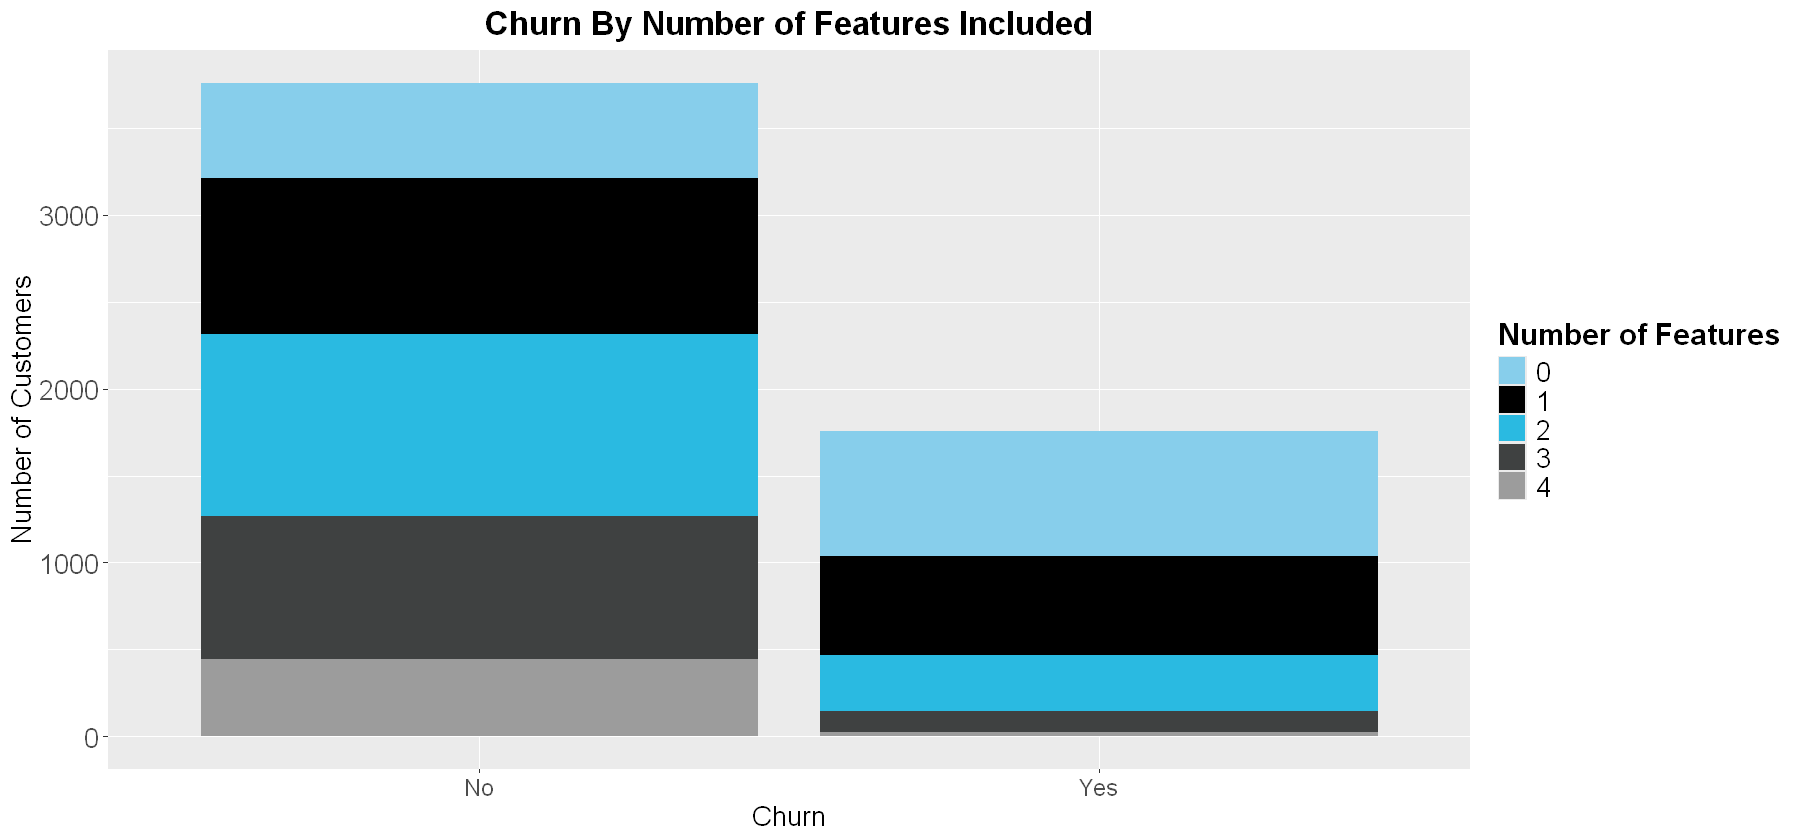

In [150]:
ggplot(Features, aes(x = Churn_Label, fill = Feat)) +
    geom_bar() +
    labs(
        title = "Churn By Number of Features Included",
        x = "Churn",
        y = "Number of Customers"
        ) +
    scale_fill_manual(values = c(
       "1" = "#000000",
       "2" = "#2abae1",
       "3" = "#3f4141",
       "4" = "#9c9c9c",
        "0" = "skyblue"
        ),
        name = "Number of Features") +
    theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 16)
  )

Analyzing this graph reveals a clear correlation between the number of features included in a customer’s contract and their likelihood to churn. Customers with more features bundled into their plans are less likely to leave, proven by the majority of retained customers having two or more features, while most churned customers have one or less.

This presents a potential vulnerability for Telco, as competitors could capitalize on this by offering contracts with additional features, like increased data allowances or faster download speeds, to attract customers and encourage them to switch providers.

## Why Customers Leave Due to Product/ Service

A significant portion of customer churn appears to stem from dissatisfaction with the services Telco provides. In particular, many departing customers report issues related to network reliability.


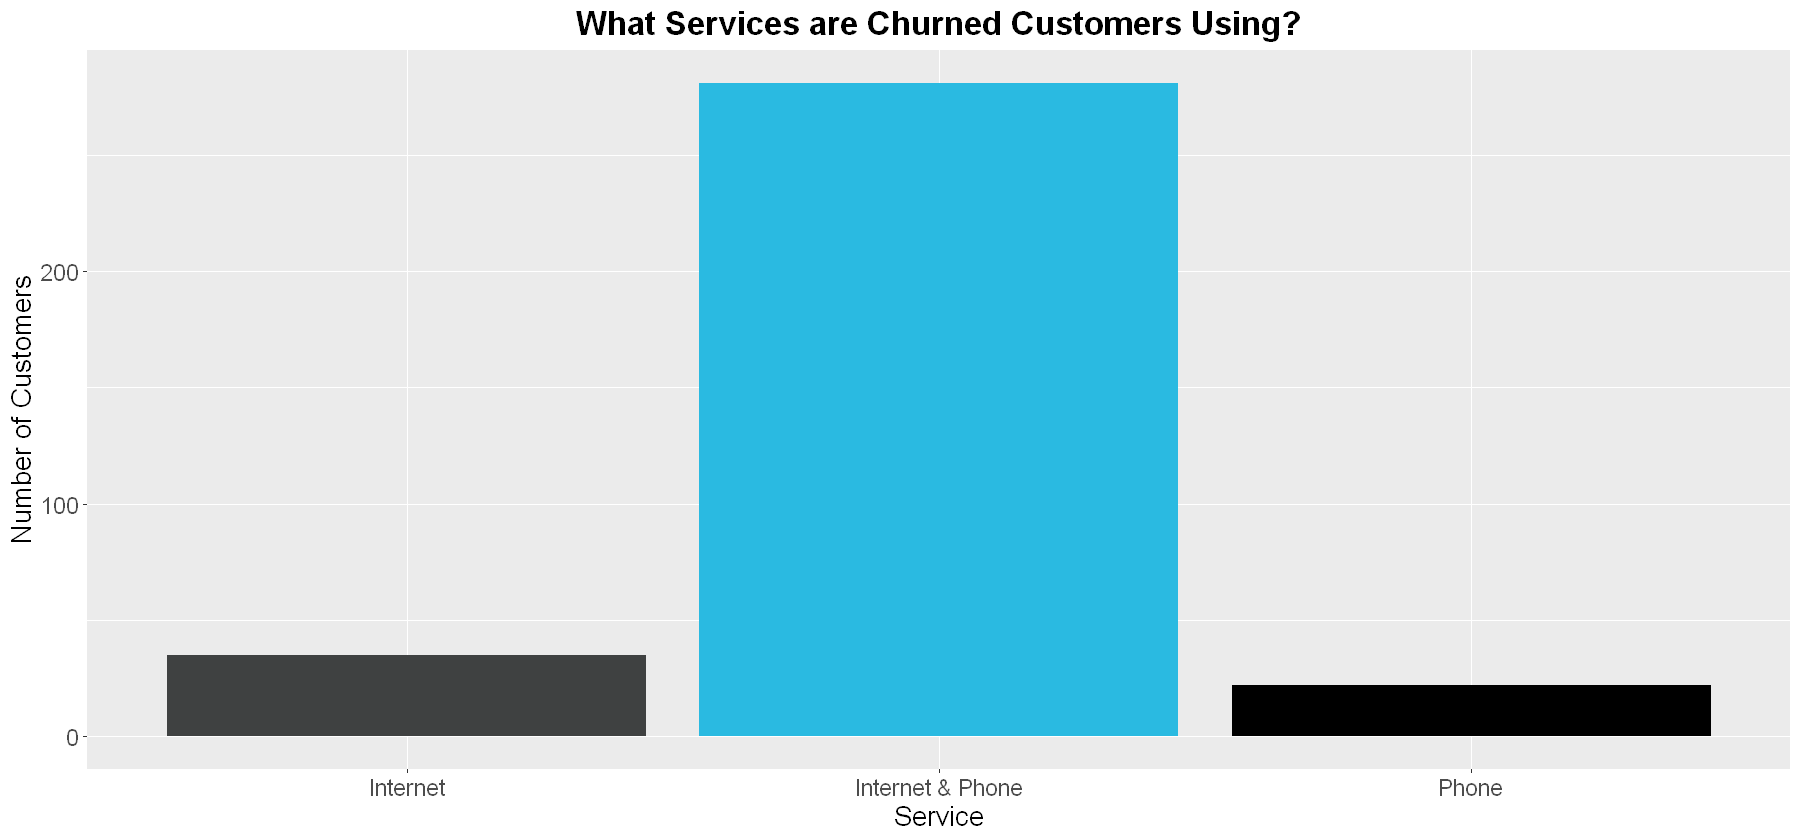

In [157]:
product_churn <- product_service_churn %>%
  mutate(
    Product_Type = case_when(
      Internet_Service == "No" & Phone_Service == "No" ~ "None",
      Internet_Service == "No" ~ "Phone",
      Phone_Service == "No" ~ "Internet",
      TRUE ~ "Internet & Phone"
    )
  )

ggplot(product_churn, aes(x = Product_Type, fill = Product_Type)) +
    geom_bar() +
    labs(
        title = "What Services are Churned Customers Using?",
        x = "Service",
        y = "Number of Customers"
        ) +
    scale_fill_manual(values = c("Internet & Phone" = "#2abae1", "Internet" = "#3f4141", "Phone" = "#000000")) +
    theme(
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)
  )

Once those customers who left due to product/service dissatisfaction have been segmented and evaluated it can be established that a majority of those responding were using both Telco internet and phone services. While this doesn't help narrow down which product or service caused dissatisfaction, we know, because of some responses, that a major issue is with Network Reliability.

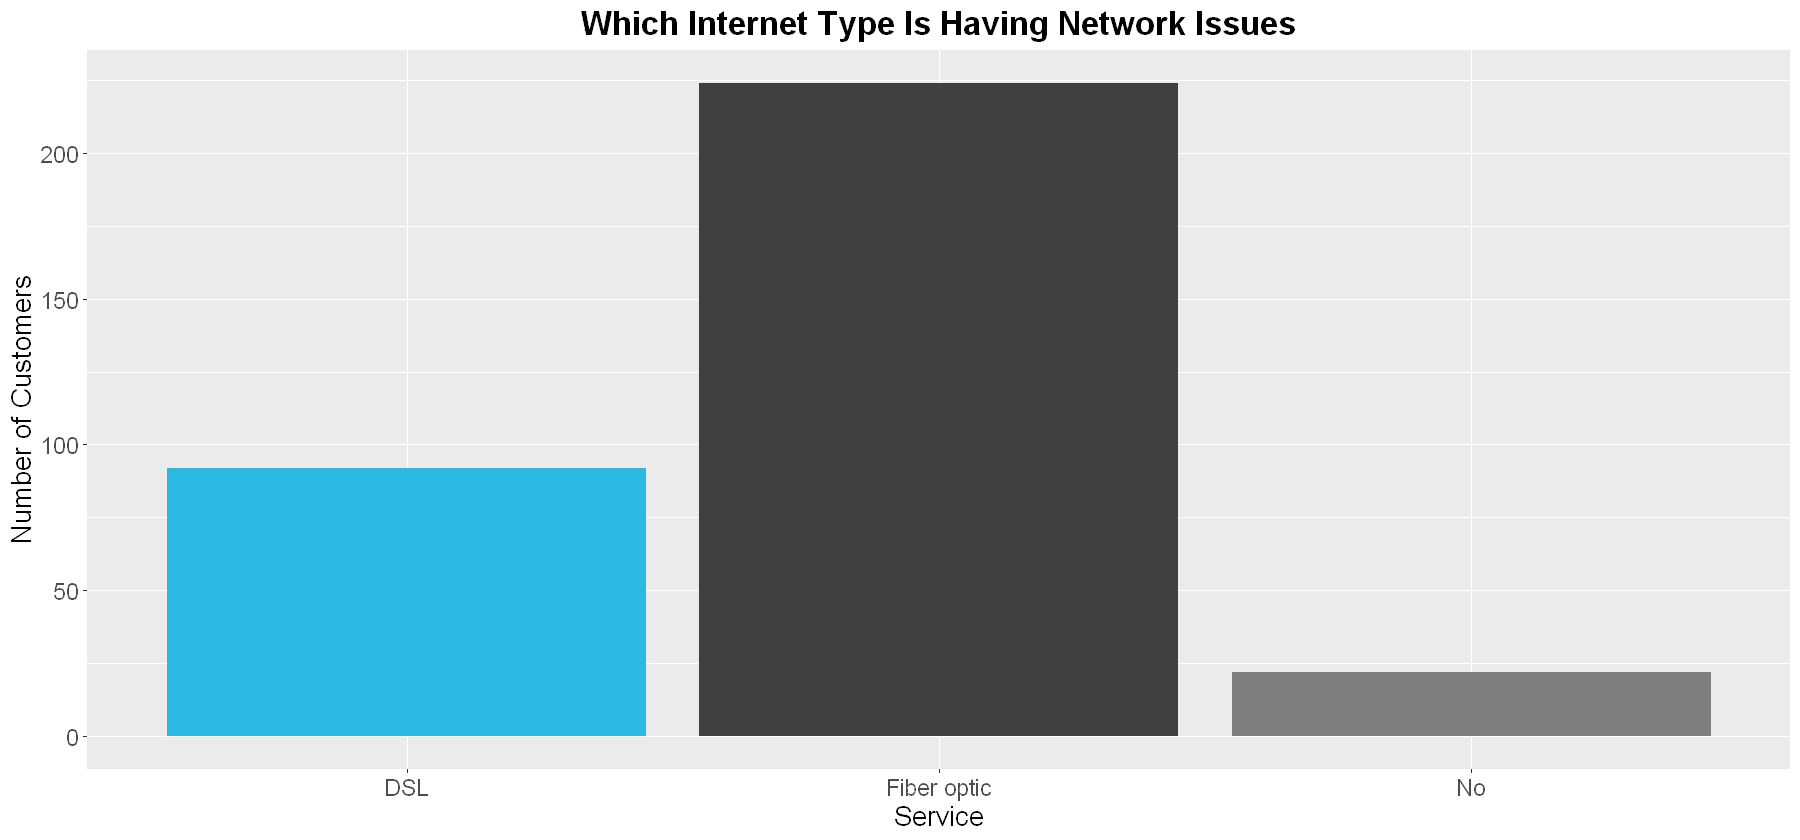

In [161]:
product_service_churn <- data[data$Churn_Reason %in% c(
  "Network reliability",
  "Product dissatisfaction",
  "Service dissatisfaction",
  "Limited range of services"
), ]

ggplot(product_service_churn, aes(x = Internet_Service, fill = Internet_Service)) +
    geom_bar() +
    labs(
        title = "Which Internet Type Is Having Network Issues",
        x = "Service",
        y = "Number of Customers"
        ) +
    scale_fill_manual(values = c("DSL" = "#2abae1", "Fiber optic" = "#3f4141")) +
    theme(
    legend.position = "none",
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)
  )

Based on the segmented group of churned customers, it seems that most customers having issues with their product or service are those using Fiber Optic Internet. This is particularly interesting to see because in theory Fiber Optic internet should be much faster and reliable than DSL.

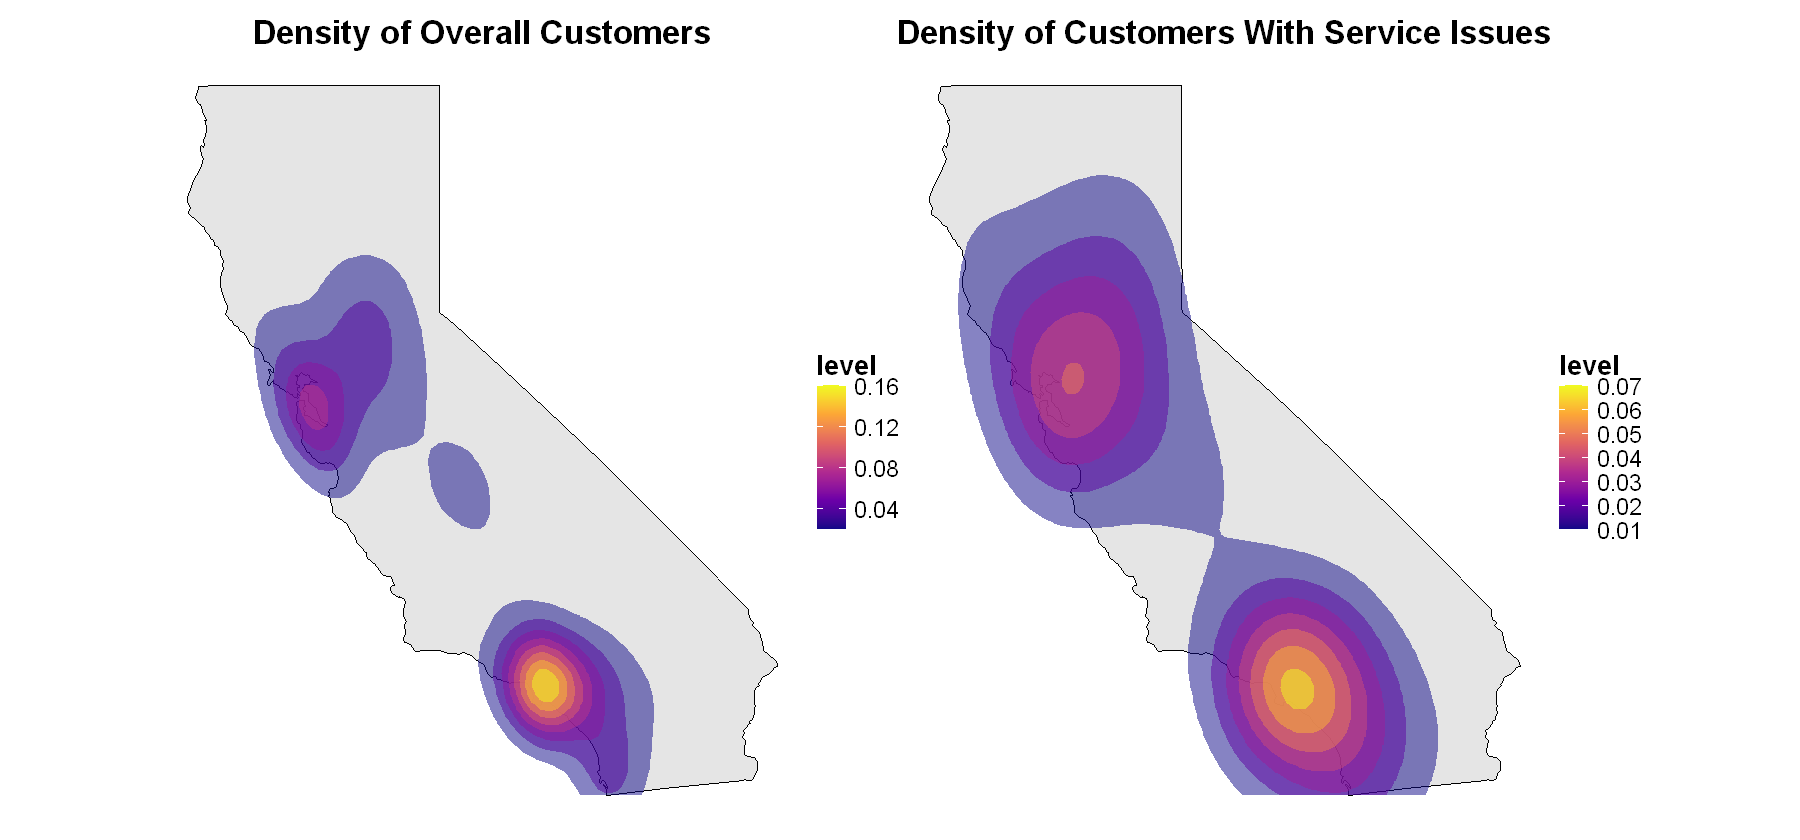

In [162]:
options(repr.plot.width = 15, repr.plot.height = 7)

us_map <- map_data("state")
ca_map <- subset(us_map, region == "california")

p1 <- ggplot(data, aes(x = Longitude, y = Latitude)) +
  geom_polygon(data = ca_map, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "black") +
  stat_density_2d(aes(fill = after_stat(level)), geom = "polygon", alpha = 0.5) +
  scale_fill_viridis_c(option = "C") +
  coord_fixed(1.3) +
  labs(title = "Density of Overall Customers") +
  theme_void() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 14)
  )

p2 <-ggplot(product_service_churn, aes(x = Longitude, y = Latitude)) +
  geom_polygon(data = ca_map, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "black") +
  stat_density_2d(aes(fill = after_stat(level)), geom = "polygon", alpha = 0.5) +
  scale_fill_viridis_c(option = "C") +
  coord_fixed(1.3) +
  labs(title = "Density of Customers With Service Issues") +
  theme_void() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 14)
  )

p1 + p2

Once mapped, we can see why these customers may be experiencing network reliability issues. While Telco’s telecommunications service covers the entire state of California, there are two major hotspots where a large concentration of users reside, one in Southern California and another in the northern part of the state.

When we overlay service issue data, it becomes clear that a significant number of affected customers are clustered mainly within these high-density areas.

This likely suggests that in these regions, the network infrastructure may be under strain due to high usage, potentially leading to slower speeds, increased latency, or inconsistent service during peak hours. Addressing performance in these geographic hotspots could have a meaningful impact on overall customer satisfaction and churn reduction.

## Why Customers Leave Due to Customer Service

Another key driver of customer churn appears to be dissatisfaction with Telco’s customer service and technical support. In today’s competitive telecom environment, poor support can easily affect customer trust and loyalty, especially when reliable alternatives are readily available.

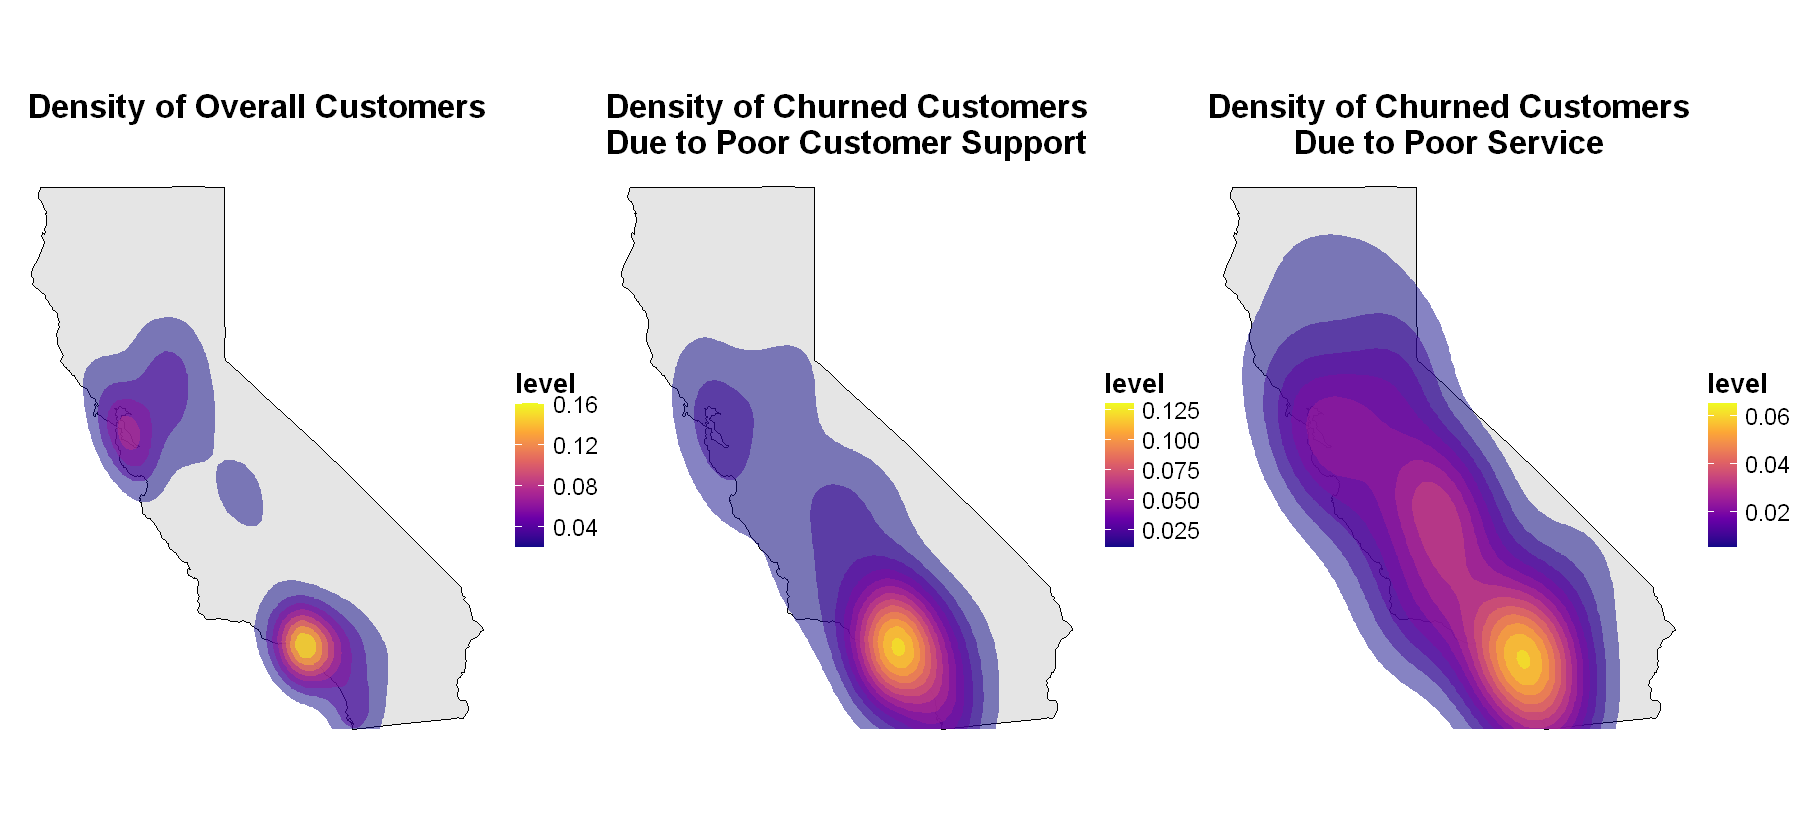

In [170]:
options(repr.plot.width = 15, repr.plot.height = 7)

attitude_churns <- data %>%
  filter(Churn_Reason == "Attitude of support person" | Churn_Reason == "Poor expertise of phone support" | Churn_Reason == "Poor expertise of online support" )

attitude_service_churns <- data %>%
  filter(Churn_Reason == "Attitude of service provider")

p3 <- ggplot(attitude_churns, aes(x = Longitude, y = Latitude)) +
  geom_polygon(data = ca_map, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "black") +
  stat_density_2d(aes(fill = after_stat(level)), geom = "polygon", alpha = 0.5) +
  scale_fill_viridis_c(option = "C") +
  coord_fixed(1.3) +
  labs(title = "Density of Churned Customers\nDue to Poor Customer Support") +
  theme_void() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 14)
  )

p4 <- ggplot(attitude_service_churns, aes(x = Longitude, y = Latitude)) +
  geom_polygon(data = ca_map, aes(x = long, y = lat, group = group),
               fill = "gray90", color = "black") +
  stat_density_2d(aes(fill = after_stat(level)), geom = "polygon", alpha = 0.5) +
  scale_fill_viridis_c(option = "C") +
  coord_fixed(1.3) +
  labs(title = "Density of Churned Customers\nDue to Poor Service") +
  theme_void() +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 16, face = "bold"),
    legend.text = element_text(size = 14)
  )


p1 + p3 +p4

By comparing the density of overall customers we can see where customers are experiencing poor interactions with customer support and with Telco as a service provider.

It's important to distinguish between poor service from an individual support agent, such as a bad attitude or lack of expertise, and broader dissatisfaction with the service provider itself.

Issues with a specific employee often reflect isolated experiences, while ongoing frustration with support processes, unhelpful policies, or a general lack of responsiveness typically points to a systemic issue within the company or brand.

This density map reveals that complaints related to individual customer support experiences are concentrated primarily in the southern half of the state. These issues, which are often tied to employee behavior, attitude, or lack of expertise, are likely localized. As such, they can be addressed through targeted solutions like enhanced training programs, performance evaluations, or employee audits to improve the quality and consistency of support interactions.

The map also reveals that broader dissatisfaction with the service provider itself. This may include issues such as unresolved technical issues, lack of support availability, or poor service reliability. This suggests that, beyond individual employee interactions, there may be systemic challenges within Telco’s support infrastructure that require organizational-level improvements, such as better service protocols, expanded support resources, or upgrades to the network itself.

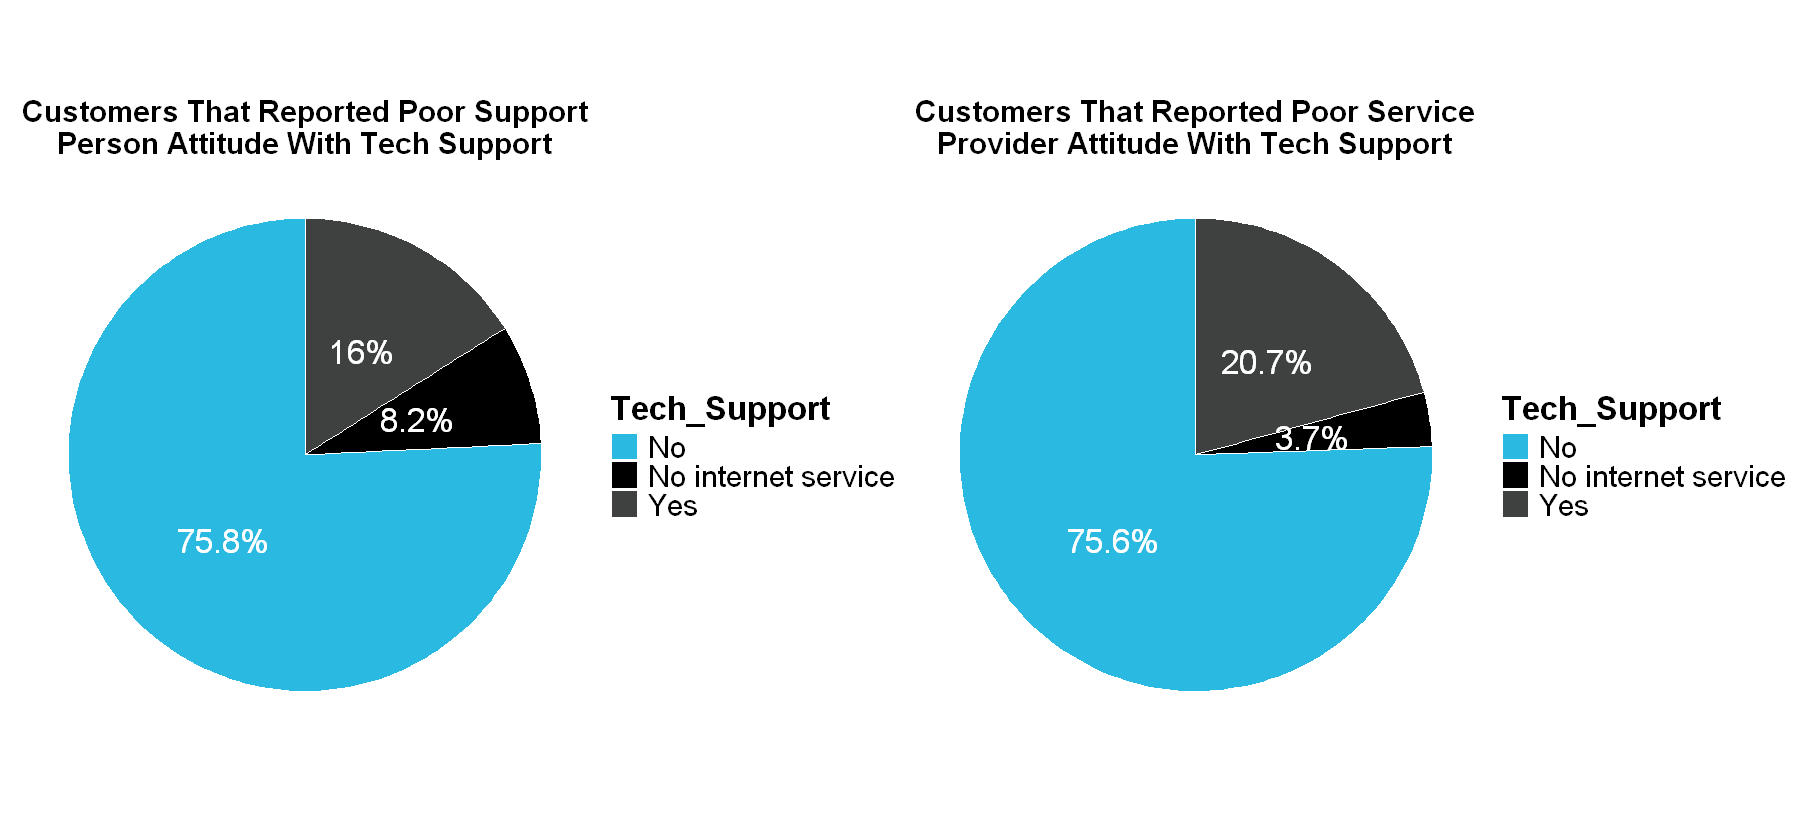

In [171]:
attitude_service_churns_counts <- attitude_service_churns %>%
  group_by(Tech_Support) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(100 * Count / sum(Count), 1))

service_ch <- ggplot(attitude_service_churns_counts, aes(x = 1, y = Count, fill = Tech_Support)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  xlim(0.5, 1.5) +
  geom_text(aes(label = paste0(Percentage, "%")),
            position = position_stack(vjust = 0.5),
            color = "white", 
            size = 7) +
  scale_fill_manual(values = c(
    "Yes" = "#3f4141",
    "No" = "#2abae1",
    "No internet service" = "#000000"
  )) +
  theme_void() +
  ggtitle("Customers That Reported Poor Service\nProvider Attitude With Tech Support") +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18)
  )

attitude_churns_counts <- attitude_churns %>%
  group_by(Tech_Support) %>%
  summarise(Count = n()) %>%
  mutate(Percentage = round(100 * Count / sum(Count), 1))

 attitude_ch <-ggplot(attitude_churns_counts, aes(x = 1, y = Count, fill = Tech_Support)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar(theta = "y") +
  xlim(0.5, 1.5) +
  geom_text(aes(label = paste0(Percentage, "%")),
            position = position_stack(vjust = 0.5),
            color = "white", 
            size = 7) +
  scale_fill_manual(values = c(
    "Yes" = "#3f4141",
    "No" = "#2abae1",
    "No internet service" = "#000000"
  )) +
  theme_void() +
  ggtitle("Customers That Reported Poor Support\nPerson Attitude With Tech Support") +
  theme(
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18)
  )

attitude_ch + service_ch

When talking about dissatisfaction with the service provider itself, an issue that comes up is a lack of support availability. These chart show the percentage of customers that left Telco due to customer service issues that had access to Tech Support. Of all the churned customers, only 16% of those that has issues with an individual had access to Tech Support and 20.7% of those that had issues with their service provider had access to Tech Support. 

These customers likely left because they were not receiving the assistance they required. This problem could be solved by making Telco Tech Support more widely available to it's customers.

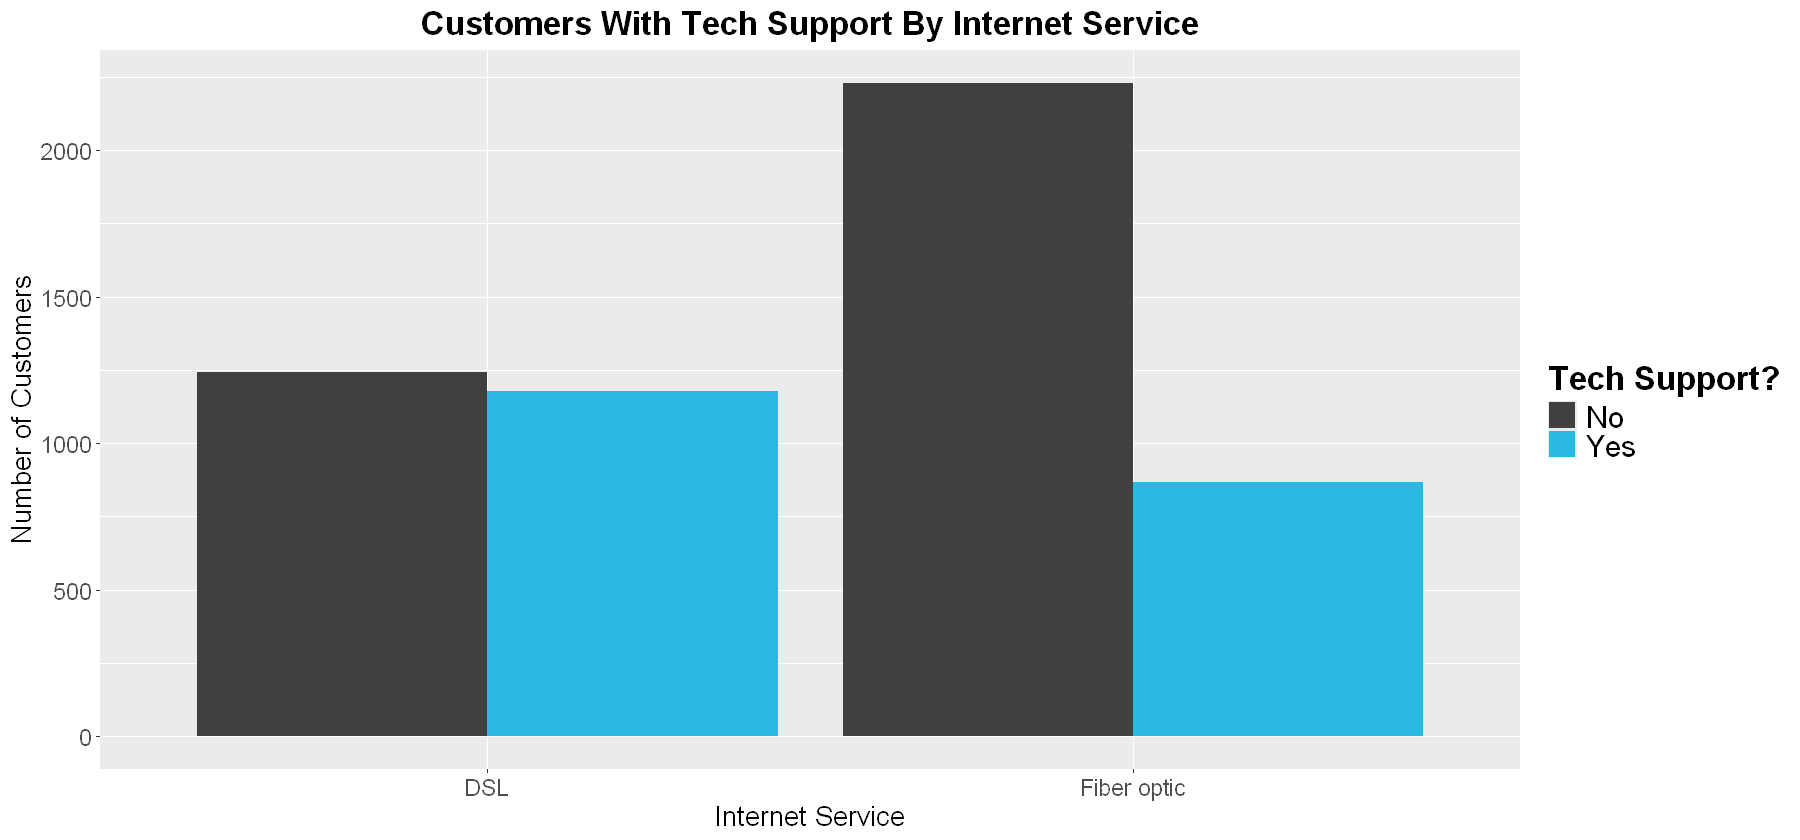

In [172]:
Internet_Service_Only <- data %>%
  filter(Internet_Service != "No")

ggplot(Internet_Service_Only, aes(x = Internet_Service, fill = Tech_Support)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Customers With Tech Support By Internet Service",
    x = "Internet Service",
    y = "Number of Customers",
    fill = "Tech Support?"
  ) +
  scale_fill_manual(values = c("Yes" = "#2abae1", "No" = "#3f4141")) +
    theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)
  )

The chart above illustrates Tech Support availability among Telco internet users. Customers using DSL services are split fairly evenly, with just over 50% lacking Tech Support. In contrast, the majority of Fiber optic users do not have access to Tech Support.

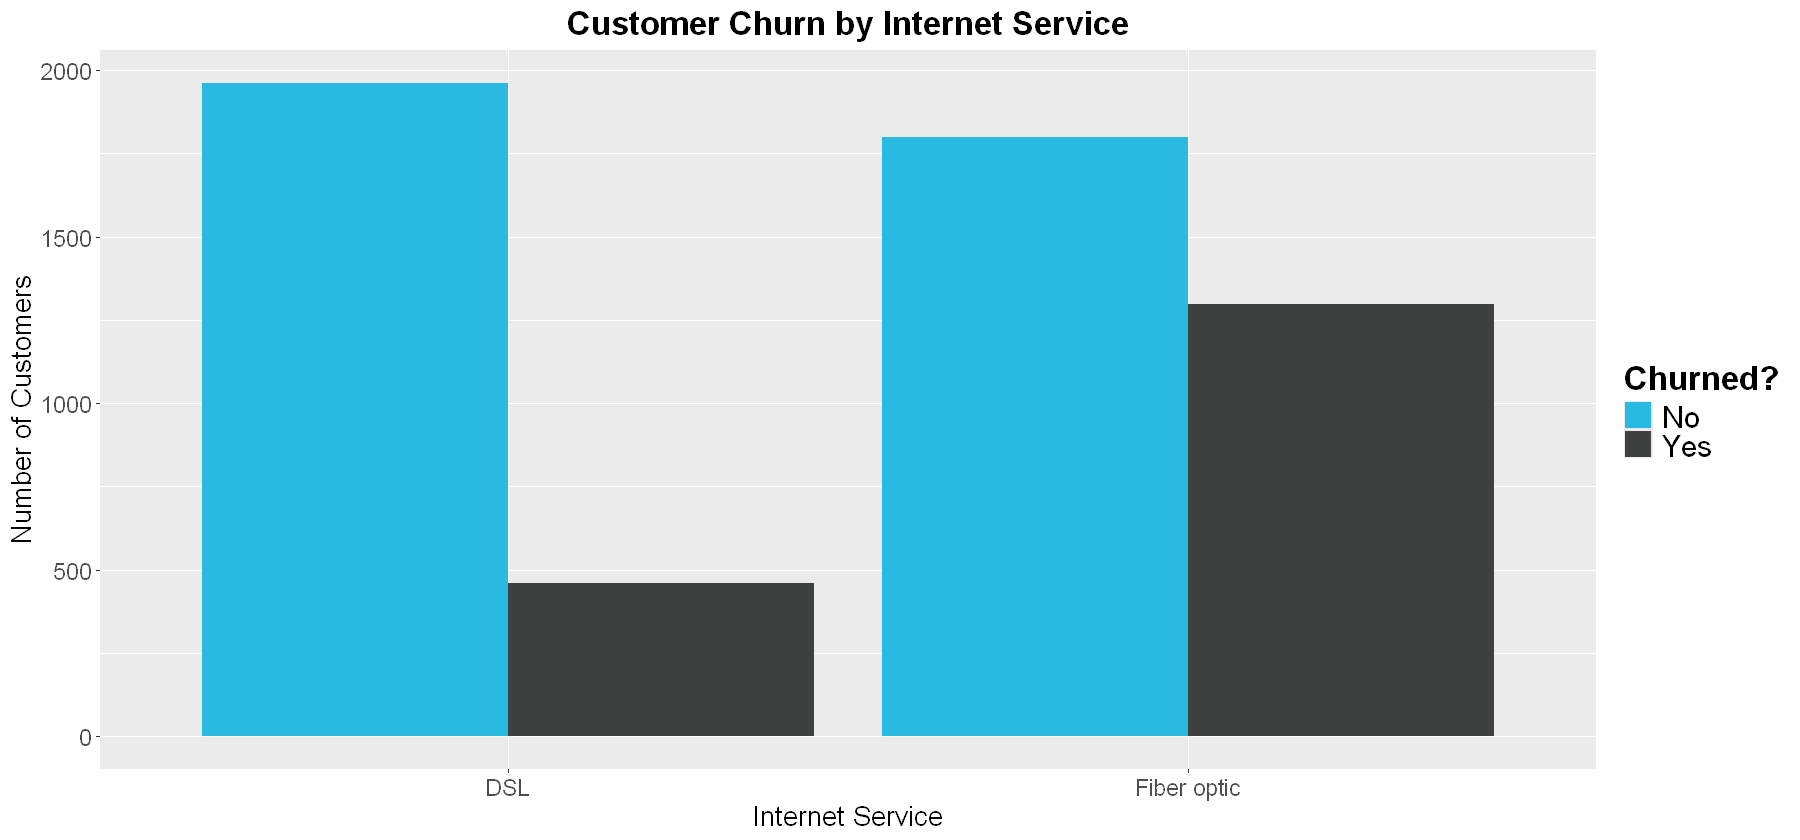

In [176]:
ggplot(Internet_Service_Only, aes(x = Internet_Service, fill = Churn_Label)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Customer Churn by Internet Service",
    x = "Internet Service",
    y = "Number of Customers",
    fill = "Churned?"
  ) +
  scale_fill_manual(values = c("Yes" = "#3f4141", "No" = "#2abae1")) +
    theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)
  )

This chart shows the number of customers who have churned, segmented by internet service type. There is a significantly higher number of Fiber optic customers churning compared to DSL customers. Given that a larger proportion of DSL customers have access to Tech Support, this suggests there may be a connection between Tech Support availability and customer retention.

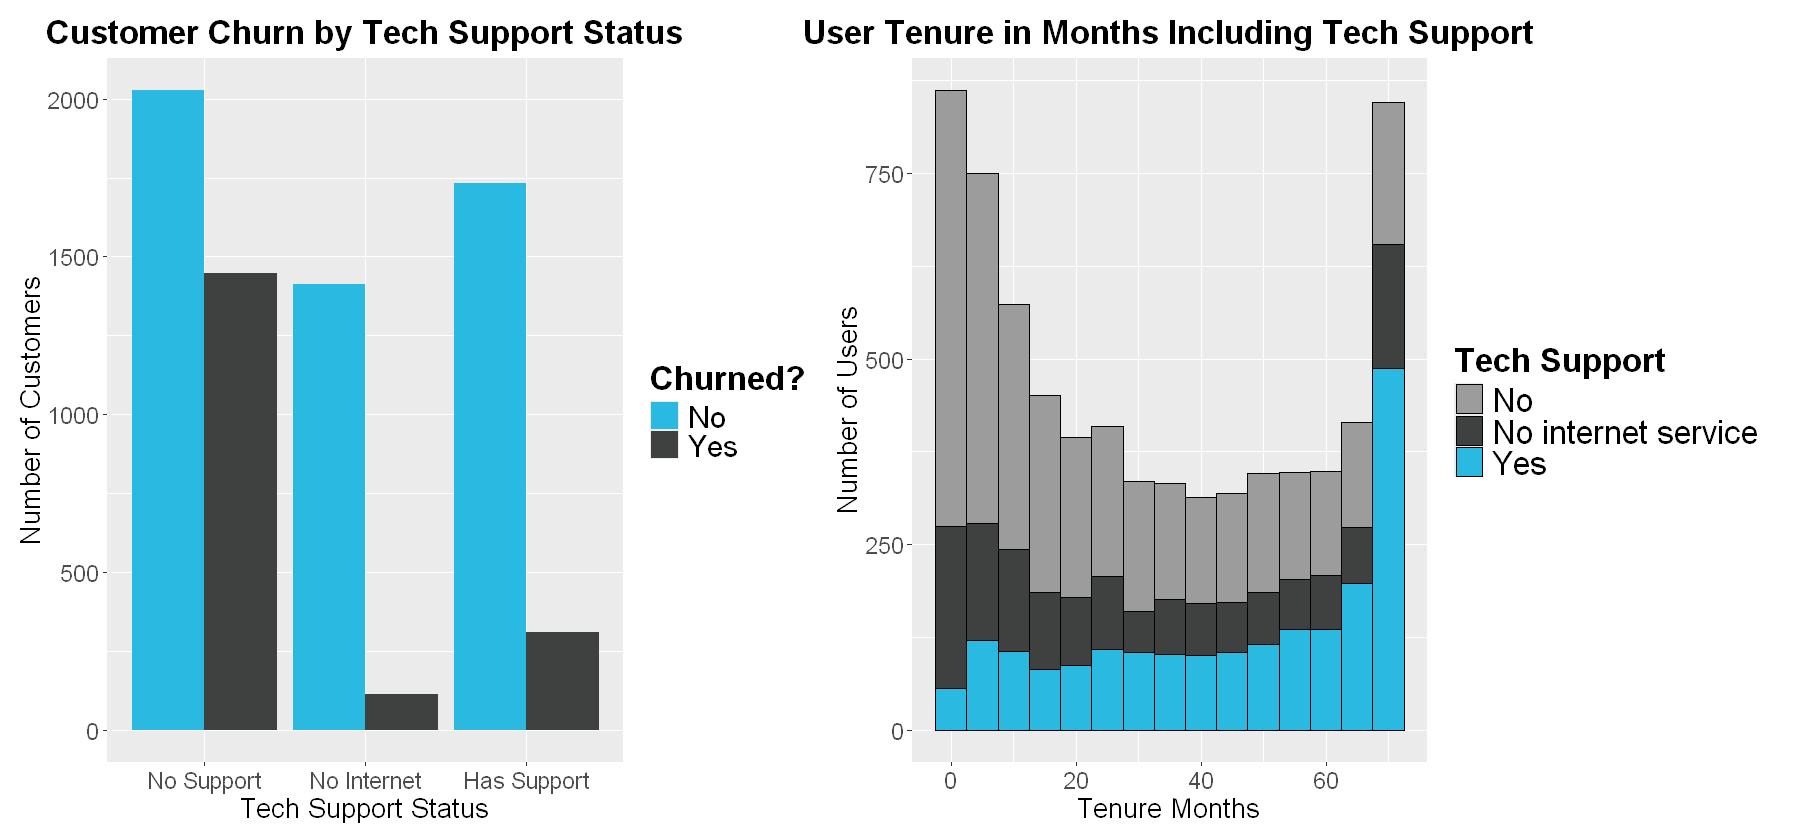

In [179]:
p5 <- ggplot(data, aes(x = Tech_Support, fill = Churn_Label)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Customer Churn by Tech Support Status",
    x = "Tech Support Status",
    y = "Number of Customers",
    fill = "Churned?"
  ) +
  scale_fill_manual(values = c("Yes" = "#3f4141", "No" = "#2abae1")) +
  scale_x_discrete(labels = c(
    "Yes" = "Has Support",
    "No" = "No Support",
    "No internet service" = "No Internet"
  )) +
    theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 18),
    axis.text.x = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.y = element_text(size = 14)
  )


p6 <- ggplot(data, aes(x = Tenure_Months, fill = Tech_Support)) +
  geom_histogram(binwidth = 5, color = "black") +
  labs(title = "User Tenure in Months Including Tech Support", x = "Values", y = "Frequency") +
  scale_fill_manual(values = c("Yes" = "#2abae1", "No" = "#9c9c9c", "No internet service"= "#3f4141")) +
  labs(fill = "Tech Support",
      x = "Tenure Months",
      y = "Number of Users" 
      ) +
  theme(
    plot.title = element_text(size = 20, face = "bold", hjust = 0.5),
    legend.title = element_text(size = 20, face = "bold"),
    legend.text = element_text(size = 20),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    axis.text.x = element_text(size = 14),
    axis.text.y = element_text(size = 14)
  )

p5 + p6

Further analysis indicates a likely connection between Tech Support availability and customer retention. The bar graph of churn by Tech Support status clearly shows that customers without Tech Support are significantly more likely to churn. Additionally, the histogram of customer tenure, segmented by Tech Support status, reveals that those with Tech Support tend to stay longer, while those without tend to leave earlier. These insights emphasize the role of Tech Support in improving customer retention.